# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

## (1) 데이터 가져오기

    - sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
    - diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [3]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

## (2) 모델에 입력할 데이터 X 준비하기

    - df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [4]:
df_X = diabetes.data

In [5]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
for i,feature_name in enumerate(diabetes.feature_names):
  print(f'feature {i+1} : {feature_name}')

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


In [7]:
df_x = pd.DataFrame(df_X,columns=diabetes.feature_names)

## (3) 모델에 예측할 데이터 y 준비하기

In [8]:
df_Y = diabetes.target

In [9]:
df_y = pd.DataFrame(df_Y,columns=['target'])

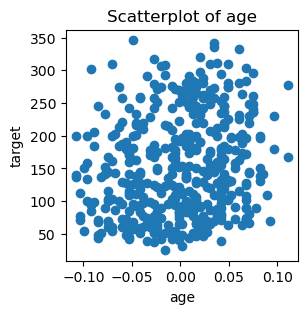

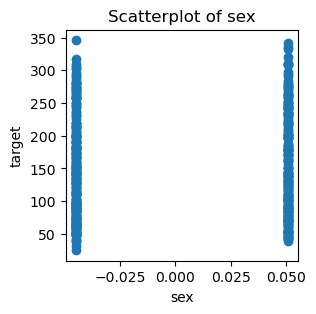

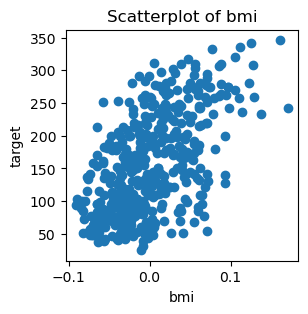

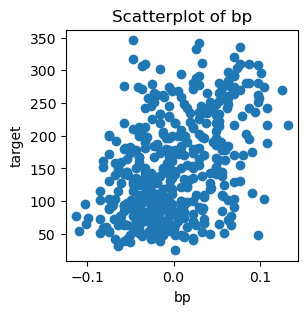

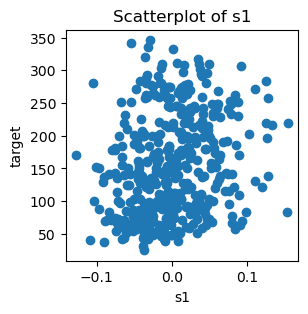

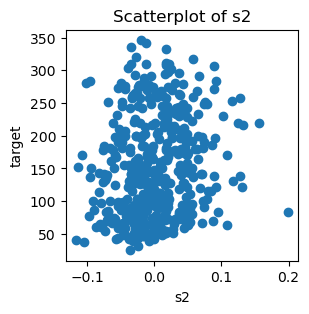

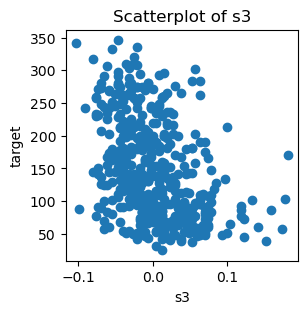

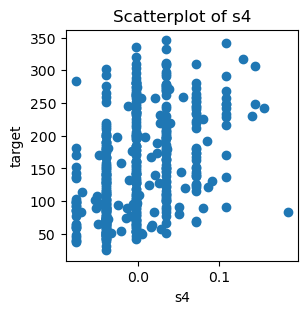

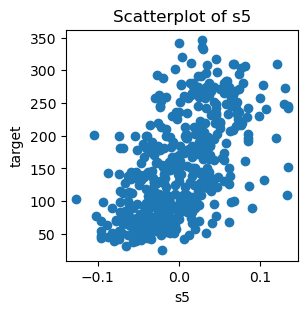

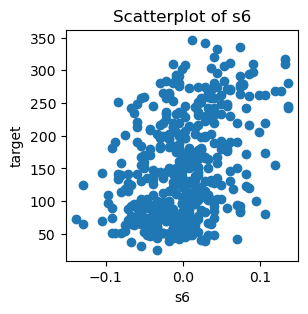

In [10]:
for col in df_x.columns:
    plt.figure(figsize=(3,3))
    plt.scatter(df_x[col],df_y['target'])
    plt.xlabel(col)
    plt.ylabel('target')
    plt.title('Scatterplot of {}'.format(col))
    plt.show()


선형 관계가 있는 데이터 피쳐 : df_x[['bmi','s5','s6','bp','age','s3']]

In [11]:
# df_x = df_x[['bmi','s5','s6','bp','age','s3']]
# df_X = df_x.to_numpy()

## (4) train 데이터와 test 데이터로 분리하기

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_X,df_Y,test_size=0.2, random_state=36)

## (5) 모델 준비하기

    - 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.모델 함수를 구현해주세요.

In [13]:
def model(x, w, b):
    y = np.sum(w * x, axis=-1) + b
    return y

## (6) 손실함수 loss 정의하기

In [14]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [15]:
def RMSE(a,b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse

In [16]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = MSE(predictions, y)
    return L


In [17]:
def loss2(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L


## (7) 기울기를 구하는 gradient 함수 구현하기

In [18]:
def gradient(x, w, b, y):
    dw = np.zeros_like(w)
    for i in range(len(w)):
        w_tmp = np.copy(w)
        w_tmp[i] += 0.0001
        dw[i] = (loss(x, w_tmp, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

## (8) 하이퍼 파라미터인 학습률 설정하기

In [46]:
lr = 0.05

## (9) 모델 학습하기

In [47]:
losses=[]
weight_history=[]
bias_history=[]

In [48]:
w = np.ones(df_X.shape[1])
b = 0

In [49]:
for i in range(1, 20000):
    dw, db = gradient(X_train, w, b, y_train)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    w -= lr * dw         # 5번: w = w - η * dw 로 업데이트
    b -= lr * db         # 5번: b = b - η * db 로 업데이트 
    L = loss(X_train, w, b, y_train)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    weight_history.append(w)
    bias_history.append(b)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 3977.6944
Iteration 2000 : Loss 3422.1012
Iteration 3000 : Loss 3196.5274
Iteration 4000 : Loss 3075.0972
Iteration 5000 : Loss 3002.2149
Iteration 6000 : Loss 2956.7197
Iteration 7000 : Loss 2927.7586
Iteration 8000 : Loss 2909.0468
Iteration 9000 : Loss 2896.7853
Iteration 10000 : Loss 2888.6328
Iteration 11000 : Loss 2883.1281
Iteration 12000 : Loss 2879.3494
Iteration 13000 : Loss 2876.7089
Iteration 14000 : Loss 2874.8283
Iteration 15000 : Loss 2873.4612
Iteration 16000 : Loss 2872.4457
Iteration 17000 : Loss 2871.6742
Iteration 18000 : Loss 2871.0741
Iteration 19000 : Loss 2870.5961


## (10) test 데이터에 대한 성능 확인하기

Training Loss: 2870.2067
Test Loss: 2978.8922
Training RMSE: 53.5743
Test RMSE: 54.5792


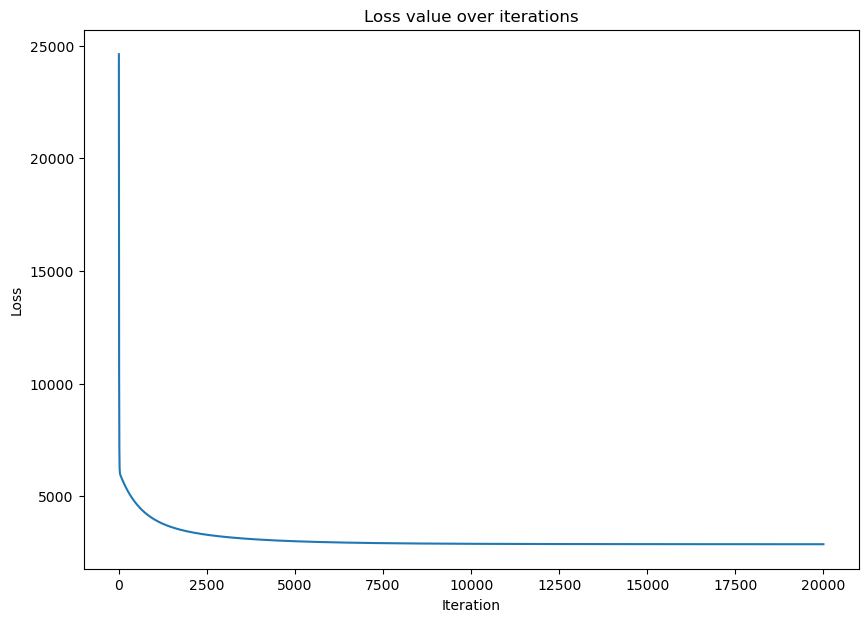

In [50]:
# Calculate and print the loss on the training set
train_loss = loss(X_train, w, b, y_train)
print(f'Training Loss: {train_loss:.4f}')

# Calculate and print the loss on the test set
test_loss = loss(X_test, w, b, y_test)
print(f'Test Loss: {test_loss:.4f}')

# Calculate and print the RMSE on the training set
train_rmse = loss2(X_train, w, b, y_train)
print(f'Training RMSE: {train_rmse:.4f}')

# Calculate and print the RMSE on the test set
test_rmse = loss2(X_test, w, b, y_test)
print(f'Test RMSE: {test_rmse:.4f}')

# Plot the loss values
plt.figure(figsize=(10, 7))
plt.plot(losses)
plt.title('Loss value over iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

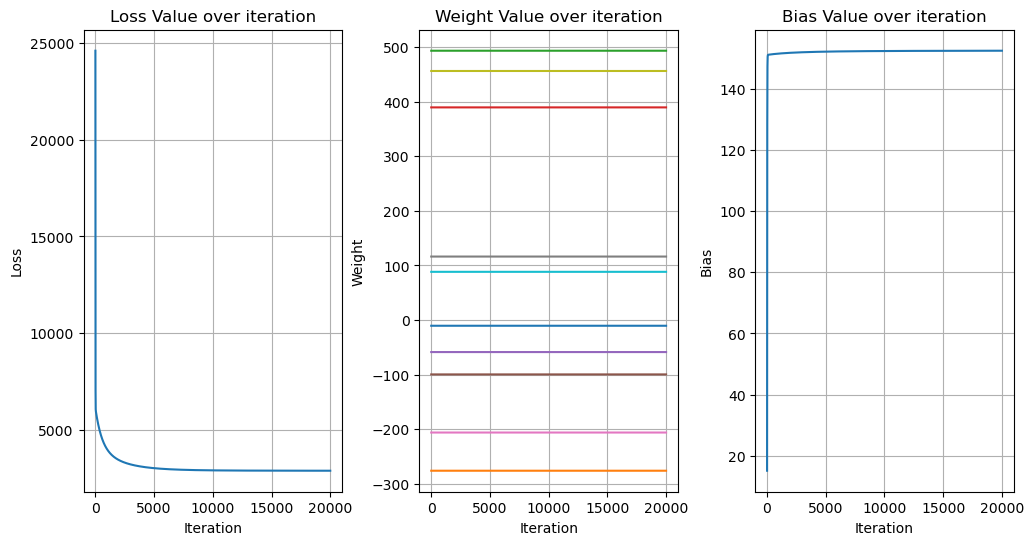

In [54]:
fig, ax = plt.subplots(1,3,figsize=(12,6))
ax[0].plot(losses)
ax[0].set_title('Loss Value over iteration')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Loss')
ax[0].grid()

ax[1].plot(weight_history)
ax[1].set_title('Weight Value over iteration')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Weight')
ax[1].grid()


ax[2].plot(bias_history)
ax[2].set_title('Bias Value over iteration')
ax[2].set_xlabel('Iteration')
ax[2].set_ylabel('Bias')
ax[2].grid()

plt.subplots_adjust(wspace=0.3)  # Adjust the width space

plt.show()

## (11) 정답 데이터와 예측한 데이터 시각화하기

    - x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

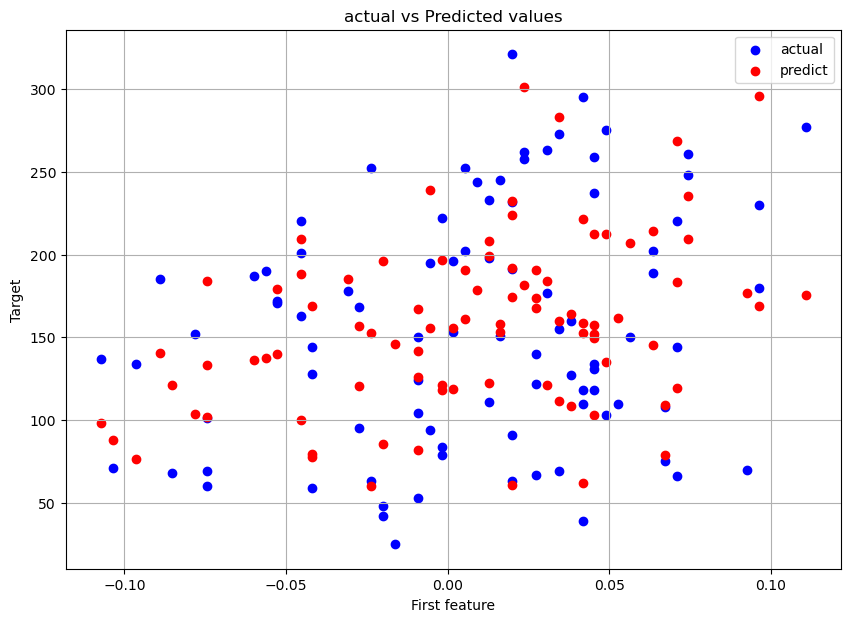

In [55]:
y_pred = model(X_test, w, b)


plt.figure(figsize=(10, 7))
plt.scatter(X_test[:, 0], y_test, color='blue', label='actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='predict')
plt.title('actual vs Predicted values')
plt.xlabel('First feature')
plt.ylabel('Target')
plt.grid()
plt.legend()
plt.show()

In [56]:
weight_history

[array([ -10.56344866, -276.16824161,  493.3238809 ,  389.49728434,
         -58.76936858,  -99.71061476, -206.19529514,  116.20908002,
         456.19553377,   88.2323457 ]),
 array([ -10.56344866, -276.16824161,  493.3238809 ,  389.49728434,
         -58.76936858,  -99.71061476, -206.19529514,  116.20908002,
         456.19553377,   88.2323457 ]),
 array([ -10.56344866, -276.16824161,  493.3238809 ,  389.49728434,
         -58.76936858,  -99.71061476, -206.19529514,  116.20908002,
         456.19553377,   88.2323457 ]),
 array([ -10.56344866, -276.16824161,  493.3238809 ,  389.49728434,
         -58.76936858,  -99.71061476, -206.19529514,  116.20908002,
         456.19553377,   88.2323457 ]),
 array([ -10.56344866, -276.16824161,  493.3238809 ,  389.49728434,
         -58.76936858,  -99.71061476, -206.19529514,  116.20908002,
         456.19553377,   88.2323457 ]),
 array([ -10.56344866, -276.16824161,  493.3238809 ,  389.49728434,
         -58.76936858,  -99.71061476, -206.19529514,